In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression


In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

In [3]:
df_raw=pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/5_Playground_Series_S3e1/Dataset/train.csv")

df=df_raw.copy()
df = df.drop(labels = ['id'], axis = 1)

### 2 | Structure Investigation

#### 2.1 | Basic Steps

In [4]:
df.shape

(37137, 9)

In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.3859      15.0  3.827160   1.112100      1280.0  2.486989     34.60   
1  3.7188      17.0  6.013373   1.054217      1504.0  3.813084     38.69   
2  4.7750      27.0  6.535604   1.103175      1061.0  2.464602     34.71   
3  2.4138      16.0  3.350203   0.965432      1255.0  2.089286     32.66   
4  3.7500      52.0  4.284404   1.069246      1793.0  1.604790     37.80   

   Longitude  MedHouseVal  
0    -120.12        0.980  
1    -121.22        0.946  
2    -120.45        1.576  
3    -117.09        1.336  
4    -122.41        4.500

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       37137 non-null  float64
 1   HouseAge     37137 non-null  float64
 2   AveRooms     37137 non-null  float64
 3   AveBedrms    37137 non-null  float64
 4   Population   37137 non-null  float64
 5   AveOccup     37137 non-null  float64
 6   Latitude     37137 non-null  float64
 7   Longitude    37137 non-null  float64
 8   MedHouseVal  37137 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


In [8]:
pd.value_counts(df.dtypes)

float64    9
dtype: int64

### 2.2 | Null Value Check

* No null observed

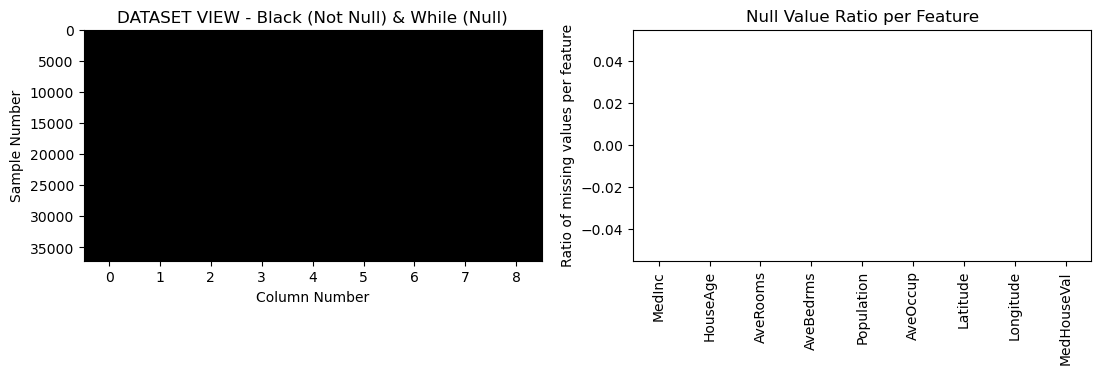

In [9]:
# Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

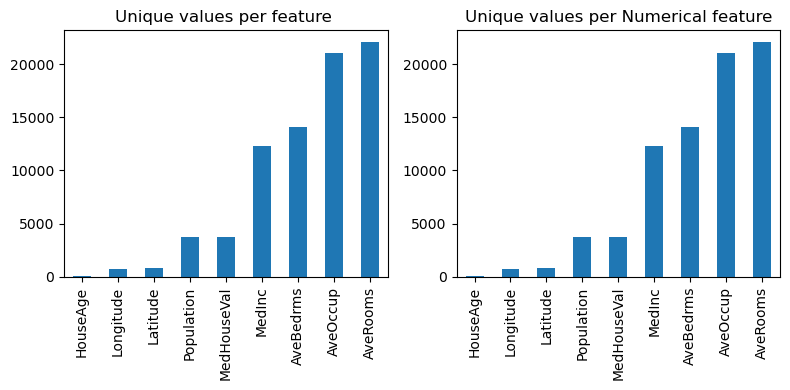

In [10]:
# Combined Plot

plt.subplots(1,2,figsize=(8,4),squeeze=False)
plt.subplot(1,2,1)
df.nunique().sort_values().plot.bar(  title="Unique values per feature ")
plt.subplot(1,2,2)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.tight_layout()
plt.show()

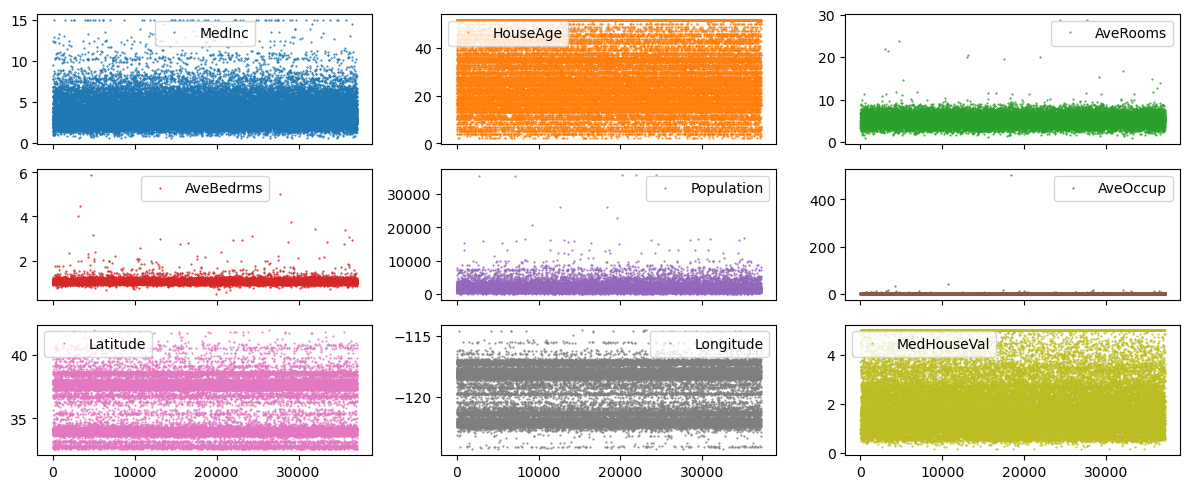

In [11]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=1)
plt.tight_layout()


In [12]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  37137.000000  37137.000000  37137.000000  37137.000000  37137.000000   
mean       3.851029     26.057005      5.163124      1.062204   1660.778919   
std        1.803167     12.158221      1.206242      0.096490   1302.469608   
min        0.499900      2.000000      0.851064      0.500000      3.000000   
25%        2.602300     17.000000      4.357522      1.020305    952.000000   
50%        3.515600     25.000000      5.068611      1.054545   1383.000000   
75%        4.699700     35.000000      5.858597      1.088825   1856.000000   
max       15.000100     52.000000     28.837607      5.873181  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  37137.000000  37137.000000  37137.000000  37137.000000  
mean       2.831243     35.570030   -119.554329      2.079751  
std        2.702413      2.083179      1.974028      1.158571  
min        0.950000     32.550000   -124.350000      0.149990  
25%        2.394495     33.930000   -121.800000      1.208000  
50%        2.744828     34.190000   -118.450000      1.808000  
75%        3.125313     37.700000   -118.020000      2.660000  
max      502.990610     41.950000   -114.550000      5.000010

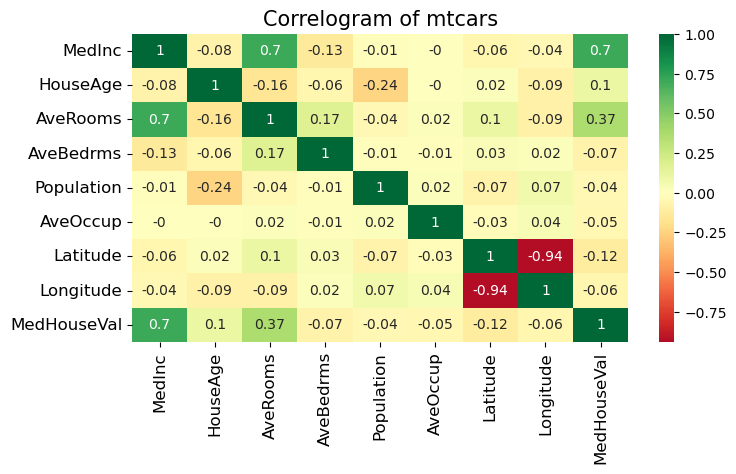

In [13]:
# Plot

plt.figure(figsize=(8,4))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

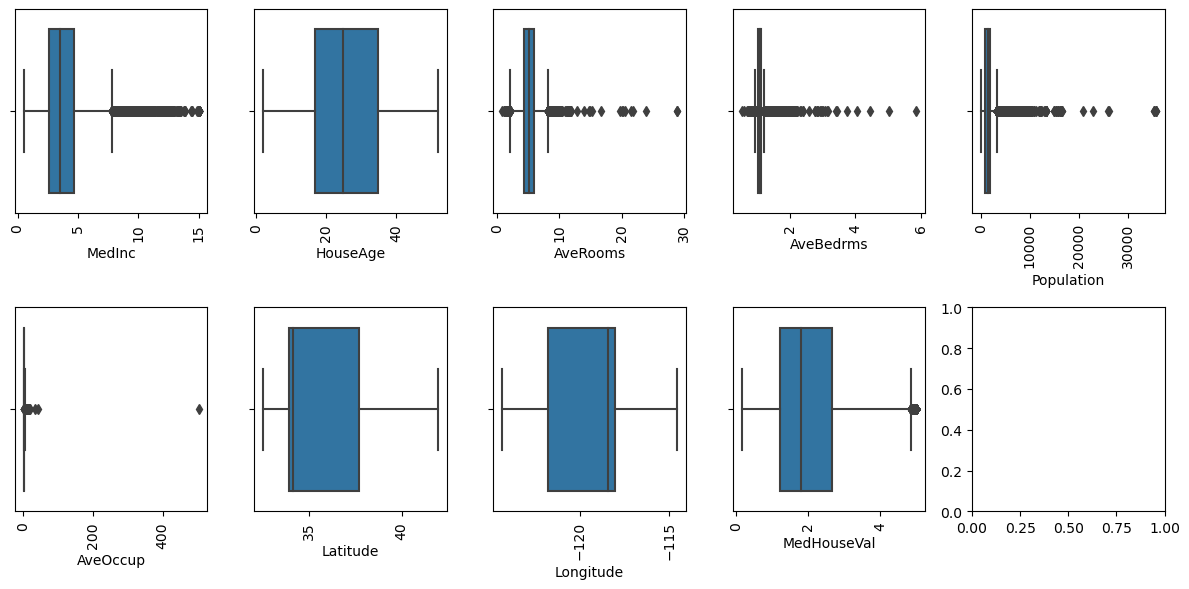

In [14]:
x_ax=df.columns.to_list()


figuresize=(12,6)
cols=5
rows=math.ceil(len(x_ax)/cols)


plt.subplots(rows,cols,figsize=figuresize )

for i in range(1,len(x_ax)+1) :
    plt.subplot(rows,cols,i)
    sns.boxplot(x=df[x_ax[i-1]])
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()

In [15]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

for i in upper.index:
    df[i]=np.where((df[i]<lower[i]),lower[i],df[i])
    df[i]=np.where( (df[i]> upper[i]),upper[i],df[i])

2


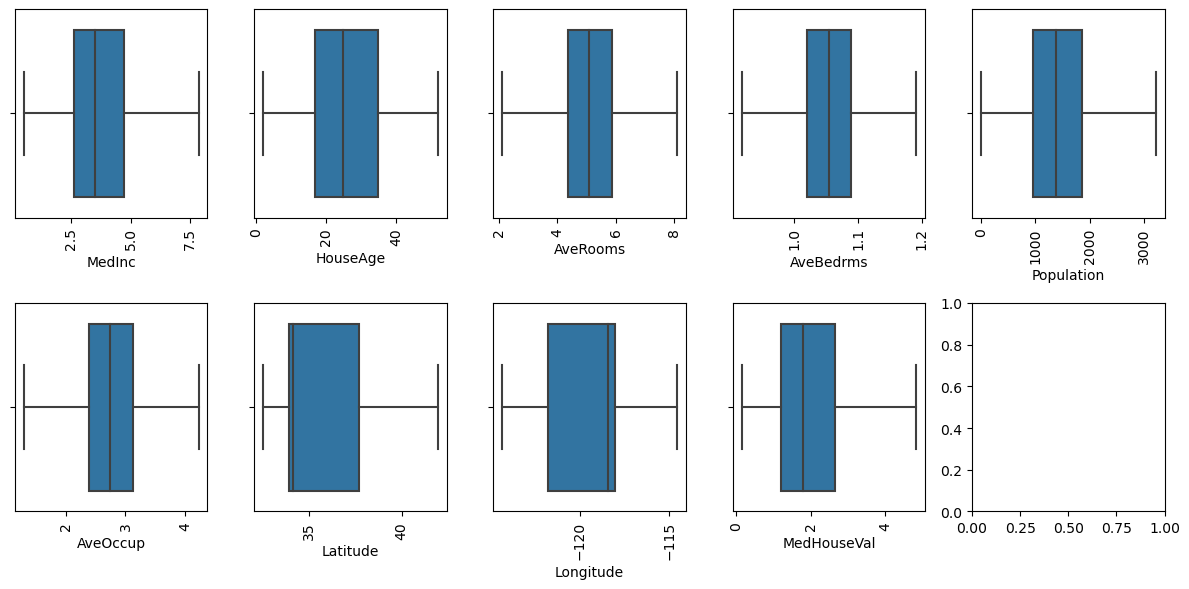

In [16]:
x_ax=df.columns.to_list()


figuresize=(12,6)
cols=5
rows=math.ceil(len(x_ax)/cols)
print(rows)

plt.subplots(rows,cols,figsize=figuresize )

for i in range(1,len(x_ax)+1) :
    plt.subplot(rows,cols,i)
    sns.boxplot(x=df[x_ax[i-1]])
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()

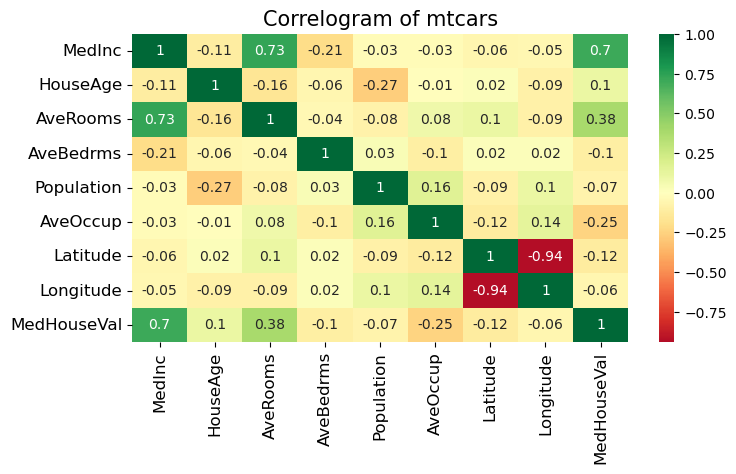

In [17]:
# Plot

plt.figure(figsize=(8,4))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

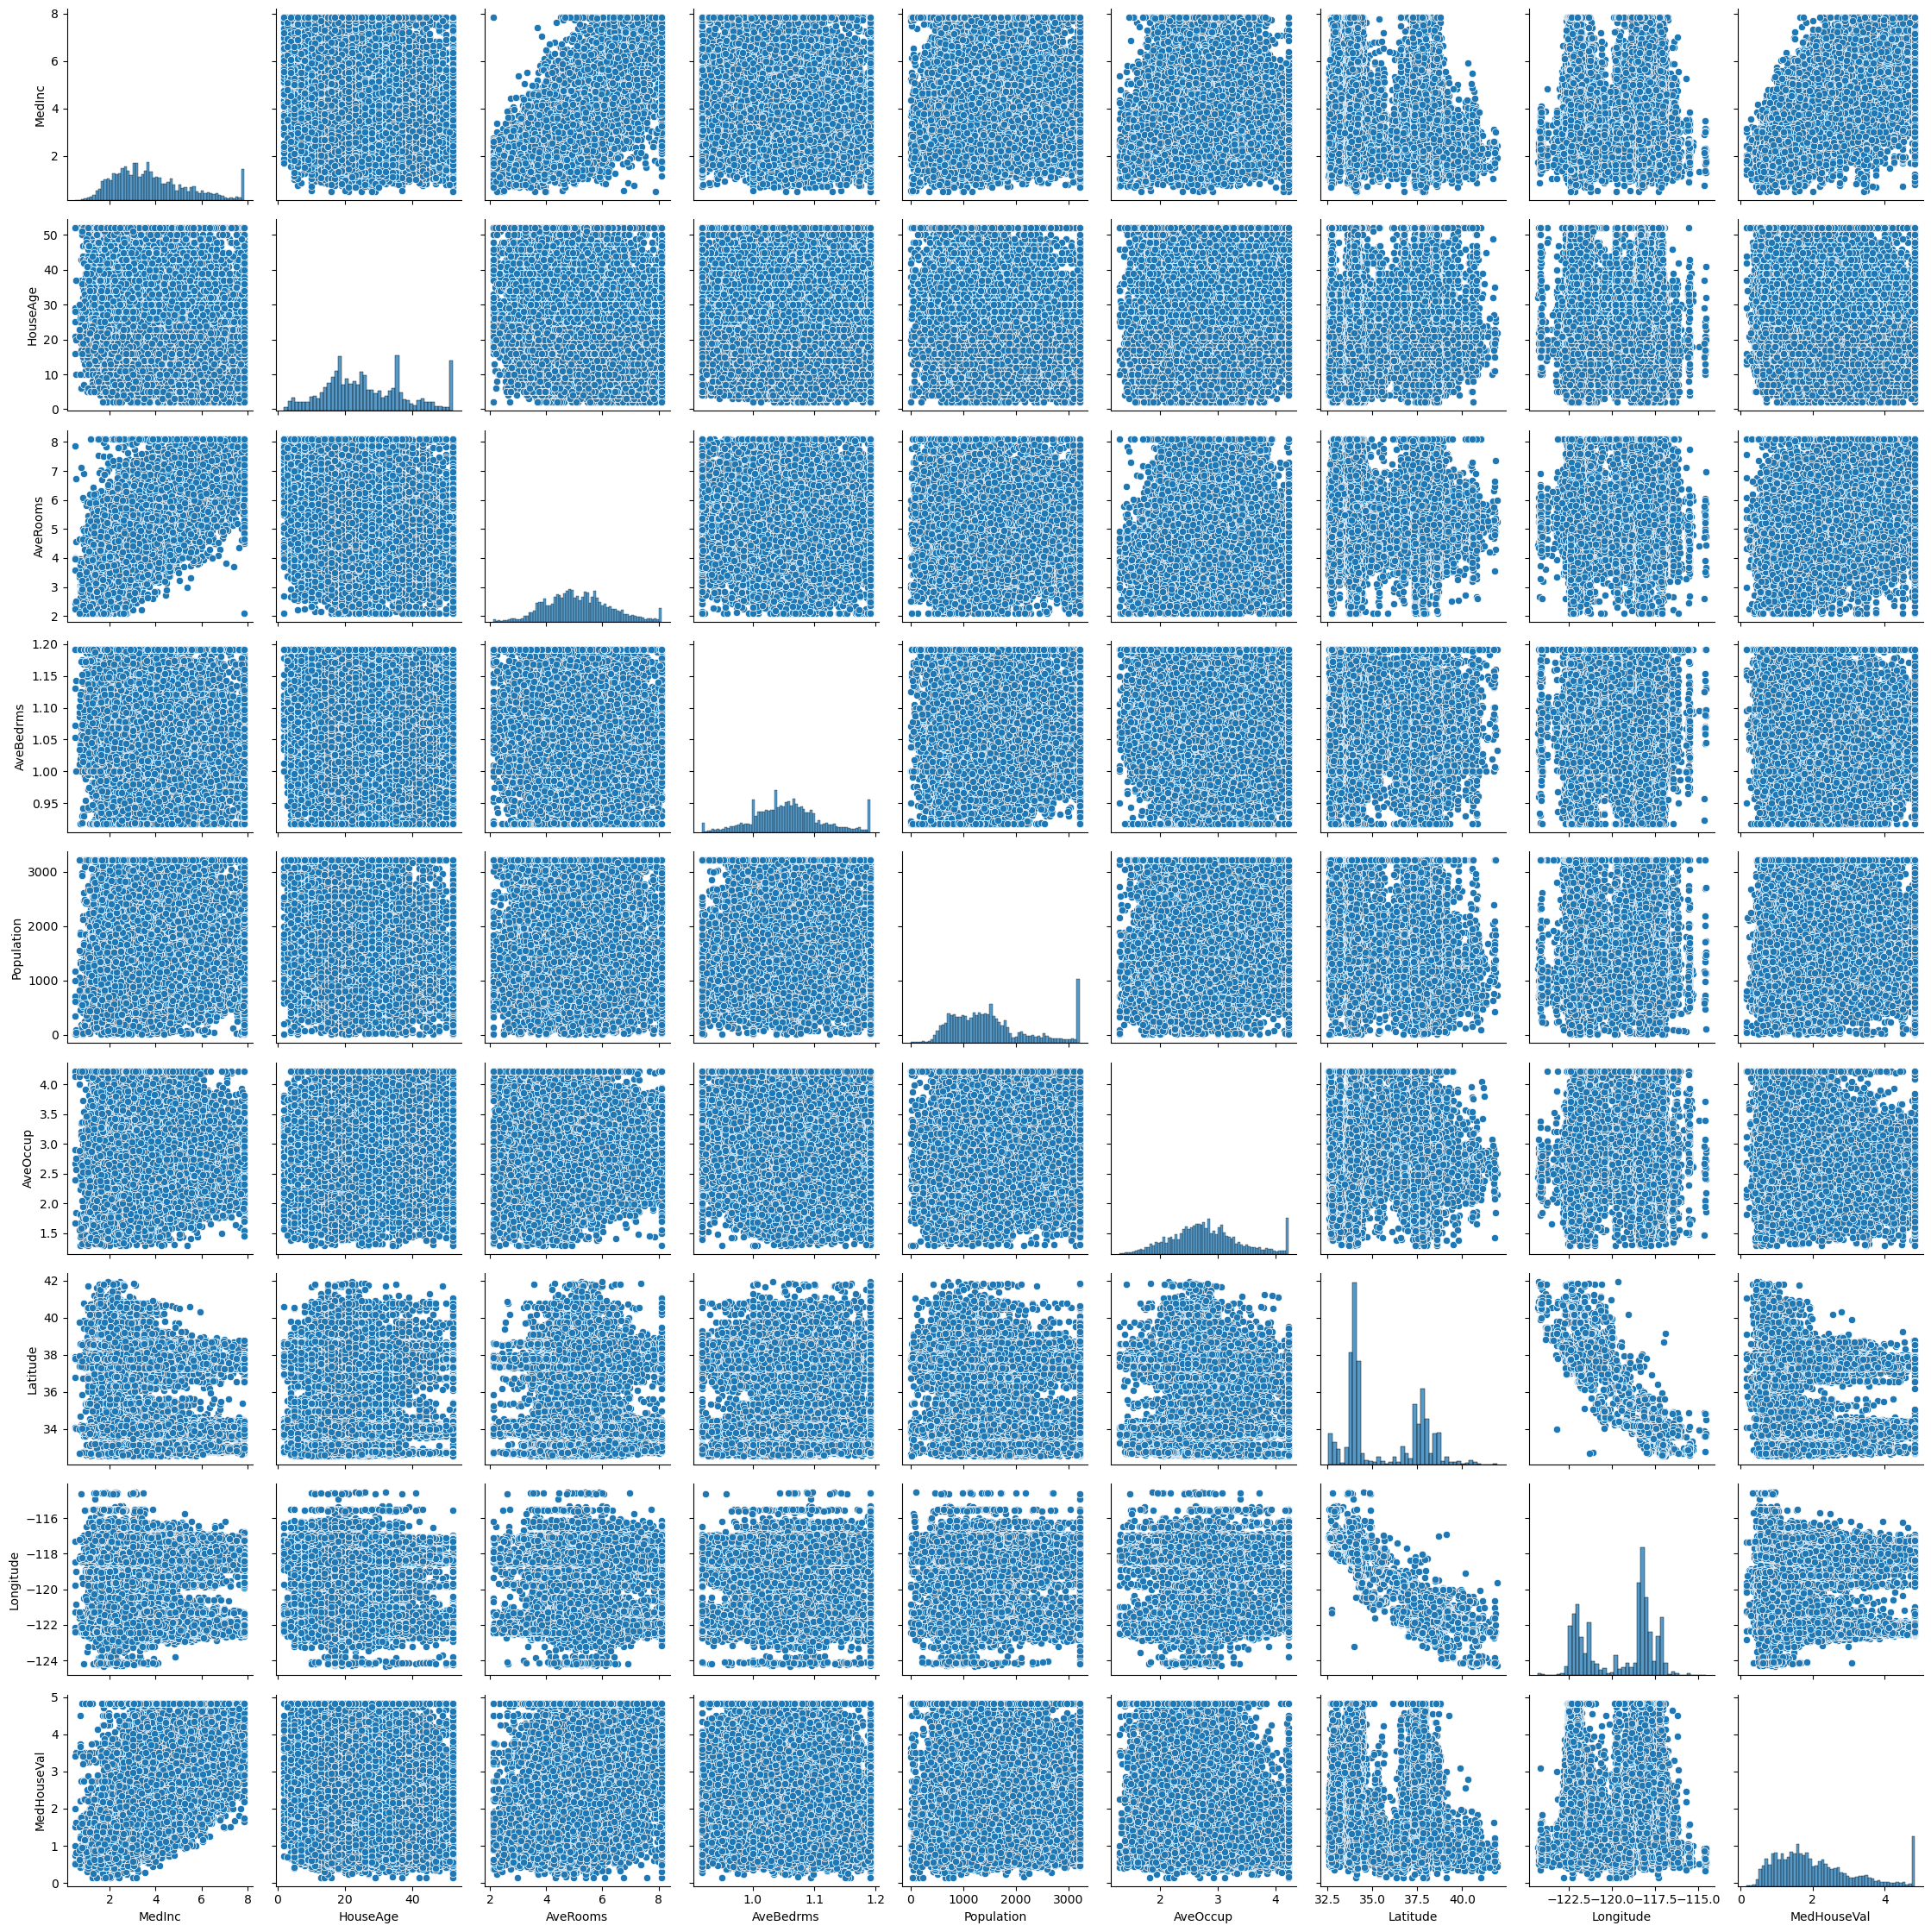

In [18]:
sns.pairplot(df)
plt.tight_layout()

In [19]:
x = df.drop(labels = ['MedHouseVal'], axis = 1)
y = df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.7,random_state=5)

In [28]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [29]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
regr = MLPRegressor(random_state=1, max_iter=500,alpha=0.00001).fit(x_train, y_train)

In [31]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [53]:
regr.predict(x_test)

array([2.59680694, 0.78822064, 2.35634688, ..., 2.0375546 , 2.56614002,
       0.34686118])

In [32]:
prediction = lreg.predict(x_test)
print(metrics.r2_score(y_test,prediction))

0.6451196111718434


In [55]:
prediction = regr.predict(x_test)
print(metrics.r2_score(y_test,prediction))

0.7046794510375629


In [33]:
test_df = pd.read_csv("/Users/abhi011097/Workspace/Dataset_Analysis/5_Playground_Series_S3e1/Dataset/test.csv")
test_df_raw=test_df.copy()

test_df = test_df.drop(labels = ['id'], axis = 1)
test_df.head()
test_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  1.7062      35.0  4.966368   1.096539      1318.0  2.844411     39.75   
1  1.3882      22.0  4.187035   1.098229      2296.0  3.180218     33.95   
2  7.7197      21.0  7.129436   0.959276      1535.0  2.888889     33.61   
3  4.6806      49.0  4.769697   1.048485       707.0  1.743590     34.17   
4  3.1284      25.0  3.765306   1.081633      4716.0  2.003827     34.17   

   Longitude  
0    -121.85  
1    -118.29  
2    -117.81  
3    -118.34  
4    -118.29

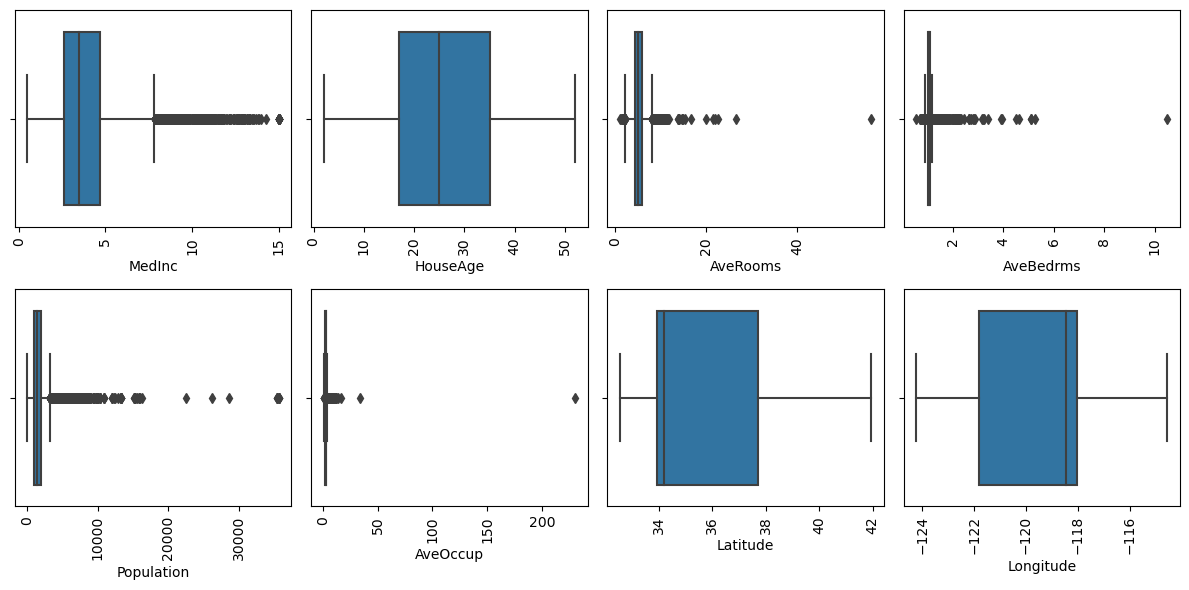

In [24]:
x_ax=test_df.columns.to_list()


figuresize=(12,6)
cols=4
rows=math.ceil(len(x_ax)/cols)


plt.subplots(rows,cols,figsize=figuresize )

for i in range(1,len(x_ax)+1) :
    plt.subplot(rows,cols,i)
    sns.boxplot(x=test_df[x_ax[i-1]])
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()

In [25]:
upper =test_df.quantile(0.75)+1.5 *(test_df.quantile(0.75)-test_df.quantile(0.25))
lower = test_df.quantile(0.25)-1.5 *(test_df.quantile(0.75)-test_df.quantile(0.25))

for i in upper.index:
    test_df[i]=np.where((test_df[i]<lower[i]),lower[i],test_df[i])
    test_df[i]=np.where( (test_df[i]> upper[i]),upper[i],test_df[i])

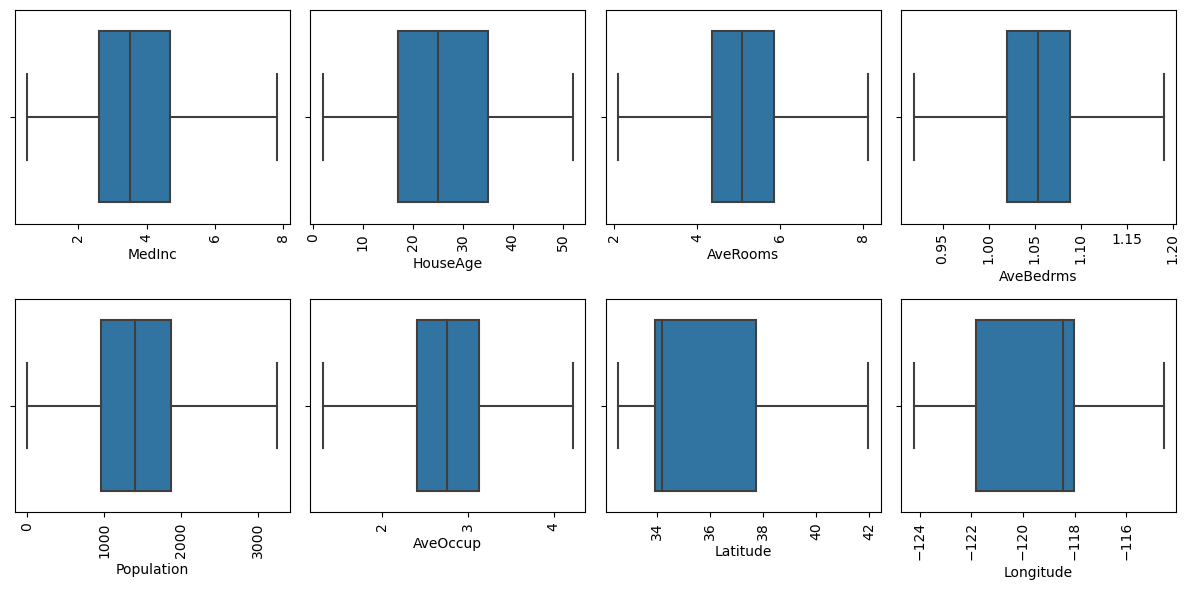

In [26]:
x_ax=test_df.columns.to_list()


figuresize=(12,6)
cols=4
rows=math.ceil(len(x_ax)/cols)


plt.subplots(rows,cols,figsize=figuresize )

for i in range(1,len(x_ax)+1) :
    plt.subplot(rows,cols,i)
    sns.boxplot(x=test_df[x_ax[i-1]])
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.title(x[i-1])
plt.show()

In [27]:
# test_df = test_df.set_index('id')

test_df = scaler.transform(test_df)


NameError: name 'scaler' is not defined

In [ ]:
test_df

In [ ]:

final_predictions = regr.predict(test_df)

In [ ]:
final_predictions

In [ ]:
test_df_raw['MedHouseVal'] = final_predictions
res = test_df_raw[['id','MedHouseVal']]
res.to_csv('result.csv', index=False)

In [ ]:
final_predictions.mean()

In [ ]:
x = df.drop(labels = ['MedHouseVal','Longitude'], axis = 1)
y = df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.7,random_state=5)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=1500,alpha=0.0001).fit(x_train, y_train)

In [ ]:
lreg = LinearRegression()
lreg.fit(x_train,y_train)

In [ ]:
regr.predict(x_test)

In [ ]:
prediction

In [ ]:
prediction = lreg.predict(x_test)
print(metrics.r2_score(y_test,prediction))

In [ ]:
prediction = regr.predict(x_test)
print(metrics.r2_score(y_test,prediction))